In [115]:
import numpy as np
import pandas as pd
import sklearn # pip install scikit-leran

In [116]:
np.__version__
pd.__version__
sklearn.__version__

'1.0.2'

In [117]:
from IPython.display import Image

In [118]:
Image(url='https://git.io/JtIbf', width=500) 

In [119]:
Image(url='https://git.io/JtIbL', width=500) 

In [120]:
Image(url='https://git.io/JtIbq', width=600)

In [121]:
Image(url='https://git.io/JtIbO', width=600)

In [122]:
class Perceptron:
 
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.random.randn(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [123]:
p = Perceptron()

In [124]:
X = np.random.randn(10,3)
y = np.random.randn(10,1)

In [125]:
x = np.array([3,-1,-2]).reshape(-1,3)
p.predict(x)

AttributeError: 'Perceptron' object has no attribute 'w_'

In [126]:
p.w_

AttributeError: 'Perceptron' object has no attribute 'w_'

In [127]:
np.random.normal(1 + X.shape[1])

3.984695288487917

In [128]:
p.fit(X,y)

In [129]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [130]:
X = np.random.randn(10)

In [131]:
X = X.reshape(1,10)

In [132]:
w = w.reshape(10,1)

In [133]:
np.dot(X,w)

array([[-8.26395471]])

In [134]:
w = np.random.randn(10)

In [135]:
p = Perceptron()

In [136]:
print(p.__doc__)

None


In [137]:
class Perceptron:
    def __init__(self,epochs=100,lr=0.1):
        self.epochs = epochs
        self.lr = lr
    def fit(self,x,y):
        self.x = x
        self.y = y
        self.w = np.random.randn(self.x.shape[1],1)
        self.b = 0
        self.errors = []
        for _ in range(self.epochs):
            self.w = self.w - self.lr*self.cost()
            self.errors.append(self.cost())
    def predict(self,x):
        self.y_hat = np.dot(self.x,self.w) + self.b
        return self.y_hat
    def cost(self):
        self.err = self.predict(self.x) - self.y
        return np.sum(self.err)

In [138]:
class LinearRegression:
    def __init__(self,lr=0.001,epochs=1000):
        self.lr = lr
        self.epochs = epochs
    def fit(self,x,y):
        self.x = x
        self.y = y
        self.w = np.random.randn(1)
#        self.b = 0
        for i in range(self.epochs):
            self.w = self.w - self.lr*(self.differ())
#            self.b = self.b - self.lr*(self.differ())
    def predict(self,x):
        self.y_hat = self.x * self.w 
        return self.y_hat
    def cost(self):
        self.err = ((self.y - self.predict(self.x))**2).mean()
        return self.err
    def differ(self):
        h = 1e-5
        fxh = np.mean(self.y - self.predict(self.x+h))
        fx = np.mean(self.y - self.predict(self.x))
        self.diff = (fxh-fx)/h
        return self.diff
    def predict2(self,x):
        return x*self.w

In [139]:
lr = LinearRegression(lr=0.01,epochs=100000)

In [140]:
x = np.random.randn(100,1)
y = x*3

In [141]:
lr.fit(x,y)

In [142]:
lr.w

array([-1.25482961])

In [143]:
lr.predict2(4)

array([-5.01931842])

In [144]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)
df = pd.read_csv(s,header=None)
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [145]:
df.iloc[:,4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt

In [147]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [148]:
from sklearn.datasets import load_iris
np.array(load_iris().feature_names)[[0,2]]

array(['sepal length (cm)', 'petal length (cm)'], dtype='<U17')

In [149]:
X = df.iloc[:100,[0,2]].values

In [150]:
print(np.max(X[:,0]))
print(np.min(X[:,0]))
print(np.max(X[:,1]))
print(np.min(X[:,1]))

7.0
4.3
5.1
1.0


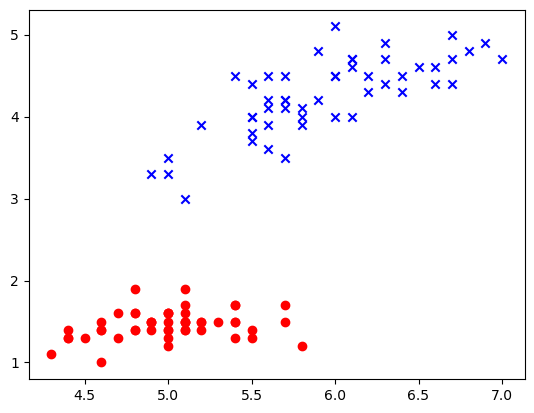

In [151]:
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:,0], X[50:, 1],
            color='blue',marker='x', label='versicolor')

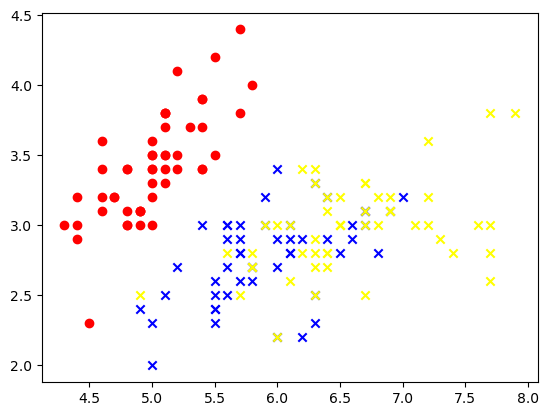

In [152]:
plt.scatter(df.iloc[:50,0], df.iloc[:50,1],
            color = 'red', marker='o', label='setosa'
           )
plt.scatter(df.iloc[50:100,0], df.iloc[50:100,1],
            color = 'blue', marker='x', label='versicolor'
           )
plt.scatter(df.iloc[100:,0], df.iloc[100:,1],
            color = 'yellow', marker='x', label='virginica'
           )

In [153]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [154]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[:100,4]
y = np.where(y=='Iris-setosa',-1,1)

In [155]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

TypeError: __init__() got an unexpected keyword argument 'eta'

In [ ]:
plot_decision_regions(X,y,ppn)

In [ ]:
X = df.iloc[:100,[1,3]].values

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

In [ ]:
plot_decision_regions(X,y,ppn)

In [ ]:
ppn.predict(np.array([2.5,2.0]).reshape(1,2))

In [156]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [157]:
from sklearn.model_selection import train_test_split

In [158]:
x = np.arange(100)
y = np.arange(100)
x1,_,_,y1 = train_test_split(x,y,test_size=0.2,shuffle=False)

In [159]:
X = load_iris().data
y = load_iris().target

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y)

In [161]:
print('y의 레이블 카운트:', np.bincount(y))
print('y의 레이블 카운트:',np.unique(y,return_counts=True)[1])
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y의 레이블 카운트:',np.unique(y_train,return_counts=True)[1])

y의 레이블 카운트: [50 50 50]
y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y의 레이블 카운트: [35 35 35]


In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [163]:
from sklearn.linear_model import Perceptron

In [164]:
ppn = Perceptron(eta0=0.1, random_state=1)

In [165]:
ppn.fit(X_train,y_train)

Perceptron(eta0=0.1, random_state=1)

In [166]:
ppn.score(X_test,y_test)

0.7555555555555555

In [167]:
ppn = Perceptron(eta0=0.1, random_state=1)

In [168]:
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.1, random_state=1)

In [169]:
ppn.score(X_test_std,y_test)

0.9111111111111111

In [170]:
pred = ppn.predict(X_test_std)

In [171]:
print('잘못분류된 개수:',y_test[pred != y_test].size)
print('잘못분류된 개수:',(pred != y_test).sum())

잘못분류된 개수: 4
잘못분류된 개수: 4


In [172]:
from sklearn.metrics import accuracy_score

In [173]:
print('정확도 : ', np.around(ppn.score(X_test_std,y_test),3))
print('정확도 : ', np.around(accuracy_score(ppn.predict(X_test_std),y_test),3))

정확도 :  0.911
정확도 :  0.911


In [174]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [175]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [176]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [177]:
# 데이터 
X = load_iris().data[:,[0,2]]
y = load_iris().target

In [178]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [180]:
X_train_std, X_test_std, y_train, y_test = train_test_split(X_std,y,test_size=0.3)

In [181]:
ppn = Perceptron(eta0=0.1, random_state=1)

In [182]:
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.1, random_state=1)

In [183]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [184]:
X = load_iris().data
y = load_iris().target

In [185]:
X = X[:100,[0,2]]
y = y[:100]

In [186]:
mm = MinMaxScaler()
mm.fit(X)
X_std = mm.transform(X)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=.2)

In [188]:
lr = LogisticRegression()

In [189]:
lr.fit(X_train,y_train)

LogisticRegression()

In [190]:
np.where(lr.predict_proba(X_test)[:,0] > lr.predict_proba(X_test)[:,1],0,1)

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [197]:
lr.coef_

array([[1.42557136, 4.18458962]])

In [199]:
lr.coef_.reshape(2, 1)

array([[1.42557136],
       [4.18458962]])

In [193]:
X_test.shape

(20, 2)

In [195]:
def sigmoid(x):
    return 1/(1+np.exp(x))
result = sigmoid(np.dot(X_test,lr.coef_.T) + lr.intercept_)
np.where(result > 0,5,0,1).flatten()

TypeError: where() takes from 1 to 3 positional arguments but 4 were given

In [200]:
import numpy as np
import pandas as ps

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [201]:
X = load_iris().data
y = load_iris().target

df = pd.DataFrame(X)
df.columns = load_iris().feature_names
df['Species'] = np.where(y == 0, 'setoas',
                        np.where(y == 1 , 'versicolor','verginica'))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setoas
1,4.9,3.0,1.4,0.2,setoas
2,4.7,3.2,1.3,0.2,setoas
3,4.6,3.1,1.5,0.2,setoas
4,5.0,3.6,1.4,0.2,setoas
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,verginica
146,6.3,2.5,5.0,1.9,verginica
147,6.5,3.0,5.2,2.0,verginica
148,6.2,3.4,5.4,2.3,verginica


In [204]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [206]:
polt_tree(tree_model,
         impurity=True,
         )
# 끊킴

NameError: name 'polt_tree' is not defined

In [214]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = load_iris().data
X = X[:,[2,3]]
y = load_iris().target
X_train, X_test, y_train, y_test = train_test_split(X,y)

rf_model = RandomForestClassifier(criterion='gini',
                                 n_estimators=25,
                                 verbose=1)

In [218]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [219]:
knn_model = KNeighborsClassifier(n_neighbors=5,
                                metric='minkowski')

In [223]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std,y)